# Univariate Regresssion

In [138]:
from IPython.display import Image

### Data Generation(Preparation)

- 공부할 시간(X)에 따른 성적 데이터(Y)를 만들어보자.

In [139]:
X = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Y = [1, 1, 2, 4, 5, 7, 8, 9, 9, 10]

- X, Y 데이터를 2D 평면 상에 시각화

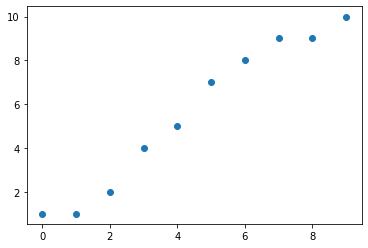

In [140]:
import matplotlib.pyplot as plt
plt.scatter(X, Y)
plt.show()

### Hypothesis Define(Model Define)

- Linear Regression 시에 활용하는 f(x) = Wx + b에서 b가 없는 간단한 버전인 f(x) = Wx 라는 모델(가설)을 구현해보자

In [141]:
class H():
  
    def __init__(self, w): 
    # 모델의 파라미터(학습을 통해 최적화될 값) w를 인풋으로 받아 모델 만들기
        self.w = w
    
    def forward(self, x):
    # 인스턴스(샘플) x가 인풋으로 들어왔을 때 모델이 예측하는 y값을 리턴
        return self.w * x
    
h = H(4) # f(x) = 4x 라는 모델 생성
pred_y = h.forward(5) # x=5 라는 인스턴스(샘플)가 인풋으로 들어왔을 때 f(5) = 4 x 5 를 통해서 20 이 정상적으로 출력
print('value of f(5) :', pred_y)
print('value of w :', h.w) # 모델 h의 내부 파라미터를 출력했을 때 4가 정상적으로 출력

value of f(5) : 20
value of w : 4


### Cost Function Define(Loss Function Define)

In [142]:
def cost(h, X, Y):
    error = 0
    for i in range(len(X)):
        error += (h.forward(X[i]) - Y[i])**2
    error = error / len(X) # MSE
    return error

h = H(4) # 4x 다시 생성
print('cost value when w = 4 :', cost(h, X, Y)) # f(x) = 4x 인 모델은 관측한 데이터셋에 대해서 222.2 라는 상당힌 큰 cost를 가짐.

def better_cost(pred_y, true_y):
  # 조금 더 나은 버전, 위에 있는 cost(h, X, Y)에서는 cost function 안에서 H(x)를 계산해야 하는 불편함 존재.
  # 일반적으로 코드를 짤 때 cost function(loss function)들은 모델이 예측한 y 값들의 리스트와 실제 y 값들의 리스트만 받아서 계산하는 구조.
  
    error = 0
    for i in range(len(X)):
        error += (pred_y[i] - true_y[i])**2
    error = error / len(X)
    return error

pred_y = [ h.forward(X[i]) for i in range(len(X)) ] # 모델 h를 통해서 각 x 인스턴스에 대한 y 값을 예측.
print('cost value with better code structure :', better_cost(pred_y, Y)) # 위 결과와 같이 222.2 라는 값이 나오는 것을 확인.

cost value when w = 4 : 222.2
cost value with better code structure : 222.2


### Cost surface Visualization

- 위에서 w=4 인 경우에 대해서 cost를 확인해보았음. 이번엔 다양한 w에 따라서 cost 값이 어떻게 바뀌는지 확인해보자.
- w = 1.25 정도 쯤에서 cost 값이 최소가 되는 듯한 양상을 보임.

[-10.0, -9.5, -9.0, -8.5, -8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5]
[3582.2, 3269.825, 2971.7, 2687.825, 2418.2, 2162.825, 1921.7, 1694.825, 1482.2, 1283.825, 1099.7, 929.825, 774.2, 632.825, 505.7, 392.825, 294.2, 209.825, 139.7, 83.825, 42.2, 14.825, 1.7, 2.825, 18.2, 47.825, 91.7, 149.825, 222.2, 308.825, 409.7, 524.825, 654.2, 797.825, 955.7, 1127.825, 1314.2, 1514.825, 1729.7, 1958.825]


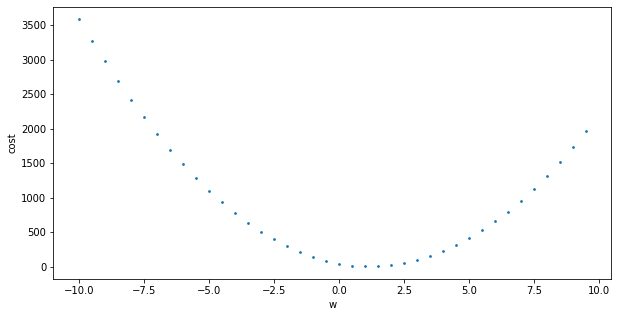

In [143]:
list_w = []
list_c = []
for i in range(-20, 20):
    w = i * 0.5
    h = H(w)
    c = cost(h, X, Y)
    list_w.append(w)
    list_c.append(c)
    
print(list_w) # w 값들이 잘 들어갔는지 확인.
print(list_c) # c 값들이 잘 들어갔는지 확인.

plt.figure(figsize=(10,5))
plt.xlabel('w')
plt.ylabel('cost')
plt.scatter(list_w, list_c, s=3)

## Gradient Descent Algorithm

이제 특정 w 근방에서의 w에 대한 cost 의 편미분(지금은 변수가 하나라 그냥 미분과 다를바 없지만)을 구해보겠습니다.

두가지 방식으로 그라디언트를 구해보자면,

첫번째 방식은 수치해석적으로 w=4 인 지점과 w=4 + eps 인 지점에서의 cost 값을 각각 구한 뒤 두 값의 차이를 통해 그라이디언트를 구하는 방식이고

두번째 방식은 cost function을 w로 편미분한 공식을 통해 바로 특정 w 에서의 그라디언트를 구하는 방식입니다.

### Compare two approach in order to compute Gradient (Analytic, Formula)

1.2105213157896242 0.43684210597565787 1.2105263157894737 0.43684210526315803


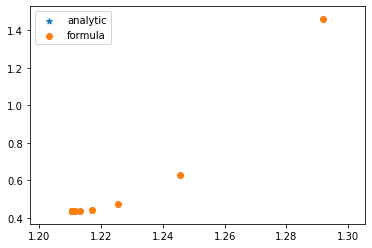

In [144]:
def cal_grad(w, cost): # 수치해석적 그라디언트 근사
    h = H(w)
    cost1 = cost(h, X, Y)
    eps = 0.00001 
    h = H(w+eps) # w에서 epsilon 만큼 떨어진 부분에서도 cost를 구해준다.
    cost2 = cost(h, X, Y)
    dcost = cost2 - cost1
    dw = eps
    grad = dcost / dw
    return grad, (cost1+cost2)*0.5

def cal_grad2(w, cost): # 편미분 공식에 바로 대입하여 그라디언트를 근사 
    h = H(w)
    grad = 0
    for i in range(len(X)):
        grad += 2 * (h.forward(X[i]) - Y[i]) * X[i]
    grad = grad / len(X)
    c = cost(h, X, Y)
    return grad, c

# 두 방식을 이용해서 w = 1.4 라는 지점에서 모델을 각각 초기화, 그 뒤 Gradient Descent Algorithm 을 통해 내려갔을 때 거의 같은 결과가 나오는지 확인해보자.
w1 = 1.4
w2 = 1.4
lr = 0.01

list_w1 = []
list_c1 = []
list_w2 = []
list_c2 = []

for i in range(100): # 총 100번의 Iteration(반복)을 통해서 학습을 진행.
    grad, mean_cost = cal_grad(w1, cost)
    grad2, mean_cost2 = cal_grad2(w2, cost)

    w1 -= lr * grad
    w2 -= lr * grad2
    list_w1.append(w1)
    list_w2.append(w2)
    list_c1.append(mean_cost)
    list_c2.append(mean_cost2)
    
print(w1, mean_cost, w2, mean_cost2) # 100번의 학습이 끝난 뒤, w1 과 w2 를 출력해보니 둘다 1.21이라는 비슷한 값으로 수렴.
  
# 매 Iteration에서의 w 값과 cost 값을 그래프 상에 찍어보면 둘이 거의 정확하게 같은 지점을 통과하므로 초록색 동그라미가 파란색 별표를 가리킴.
plt.scatter(list_w1, list_c1, label='analytic', marker='*')
plt.scatter(list_w2, list_c2, label='formula')
plt.legend()


### Compare Training process of Two Models Initialized from Different w value

1.2105263157894737 0.43684210526315803 1.2105263157894737 0.43684210526315803


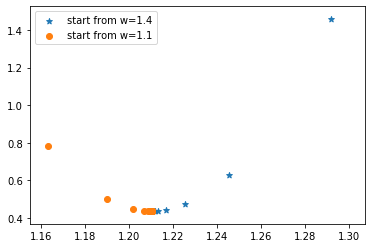

In [145]:
# 편미분 공식을 활용해서 Gradient Descent를 진행하되 서로 다른 w 지점으로 초기화 되었을 때 학습 양상
w1 = 1.4
w2 = 1.1
lr = 0.01

list_w1 = []
list_c1 = []
list_w2 = []
list_c2 = []

for i in range(100): # 총 100번의 Iteration(반복)을 통해서 학습 진행
    grad, mean_cost = cal_grad2(w1, cost)
    grad2, mean_cost2 = cal_grad2(w2, cost)

    w1 -= lr * grad
    w2 -= lr * grad2
    list_w1.append(w1)
    list_w2.append(w2)
    list_c1.append(mean_cost)
    list_c2.append(mean_cost2)
    
print(w1, mean_cost, w2, mean_cost2) # 100번의 학습이 끝난 뒤에 w1 과 w2 를 출력해보니 둘다 1.21 정도로 비슷한 값으로 수렴
  
# 서로 다른 지점으로부터 시작하였더라도 학습이 진행됨에 따라 둘 다 같은 파라미터(w=1.21)로 수렴하는 양상을 확인.
plt.scatter(list_w1, list_c1, label='start from w=1.4', marker='*')
plt.scatter(list_w2, list_c2, label='start from w=1.1')
plt.legend()

## Linear Regression with sklearn

In [146]:
from sklearn.linear_model import LinearRegression

In [147]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

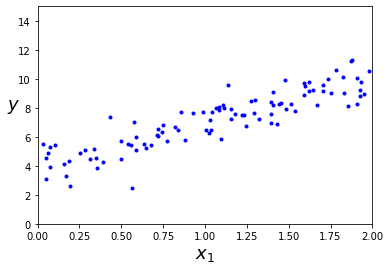

In [148]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [149]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [150]:
# 절편, 기울기
lin_reg.intercept_, lin_reg.coef_

(array([3.88388119]), array([[3.11349609]]))

In [151]:
X_new = np.array([[0], [2]])
lin_reg.predict(X_new)

array([[ 3.88388119],
       [10.11087336]])

### Linear Regression with Pytorch

In [152]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [153]:
torch.__version__

'1.9.0+cpu'

In [154]:
torch.manual_seed(1)

In [155]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

In [156]:
class LinearRegressionModel(nn.Module): # torch.nn.Module을 상속받는 파이썬 클래스
    def __init__(self): #
        super().__init__()
        self.linear = nn.Linear(1, 1) # 단순 선형 회귀이므로 input_dim=1, output_dim=1.

    def forward(self, x):
        return self.linear(x)

In [157]:
model = LinearRegressionModel()

In [158]:
# optimizer 설정. 경사 하강법 SGD를 사용하고 learning rate를 의미하는 lr은 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 

In [159]:
# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward() # backward 연산
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000


### Multiple Linear regression

In [160]:
# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [161]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1) # 다중 선형 회귀이므로 input_dim=3, output_dim=1.

    def forward(self, x):
        return self.linear(x)

In [162]:
model = MultivariateLinearRegressionModel()

In [163]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

In [164]:
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward()
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 42134.707031
Epoch  100/2000 Cost: 5.960053
Epoch  200/2000 Cost: 5.654707
Epoch  300/2000 Cost: 5.365413
Epoch  400/2000 Cost: 5.091429
Epoch  500/2000 Cost: 4.831834
Epoch  600/2000 Cost: 4.585997
Epoch  700/2000 Cost: 4.353075
Epoch  800/2000 Cost: 4.132411
Epoch  900/2000 Cost: 3.923455
Epoch 1000/2000 Cost: 3.725502
Epoch 1100/2000 Cost: 3.537972
Epoch 1200/2000 Cost: 3.360326
Epoch 1300/2000 Cost: 3.192056
Epoch 1400/2000 Cost: 3.032674
Epoch 1500/2000 Cost: 2.881700
Epoch 1600/2000 Cost: 2.738672
Epoch 1700/2000 Cost: 2.603201
Epoch 1800/2000 Cost: 2.474846
Epoch 1900/2000 Cost: 2.353286
Epoch 2000/2000 Cost: 2.238110


### Mini Batch and Batch Size

In [165]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

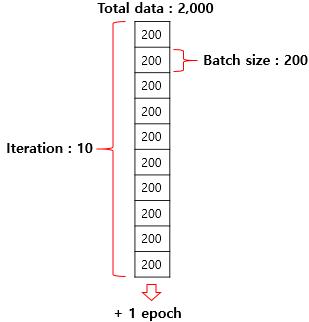

In [166]:
from IPython.display import Image
 
Image("iteration.png")

In [167]:
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

In [168]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

In [169]:
dataset = TensorDataset(x_train, y_train)

In [170]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [171]:
model = nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

In [172]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
  for batch_idx, samples in enumerate(dataloader):
    # print(batch_idx)
    # print(samples)
    x_train, y_train = samples
    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train)

    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))

Epoch    0/20 Batch 1/3 Cost: 26838.554688
Epoch    0/20 Batch 2/3 Cost: 4949.356934
Epoch    0/20 Batch 3/3 Cost: 1217.418579
Epoch    1/20 Batch 1/3 Cost: 874.723633
Epoch    1/20 Batch 2/3 Cost: 256.657257
Epoch    1/20 Batch 3/3 Cost: 24.682867
Epoch    2/20 Batch 1/3 Cost: 45.678806
Epoch    2/20 Batch 2/3 Cost: 5.590558
Epoch    2/20 Batch 3/3 Cost: 27.639938
Epoch    3/20 Batch 1/3 Cost: 8.685357
Epoch    3/20 Batch 2/3 Cost: 3.939066
Epoch    3/20 Batch 3/3 Cost: 2.802620
Epoch    4/20 Batch 1/3 Cost: 6.150103
Epoch    4/20 Batch 2/3 Cost: 7.124786
Epoch    4/20 Batch 3/3 Cost: 2.149121
Epoch    5/20 Batch 1/3 Cost: 1.789197
Epoch    5/20 Batch 2/3 Cost: 15.624210
Epoch    5/20 Batch 3/3 Cost: 3.540388
Epoch    6/20 Batch 1/3 Cost: 5.700303
Epoch    6/20 Batch 2/3 Cost: 6.880760
Epoch    6/20 Batch 3/3 Cost: 2.429880
Epoch    7/20 Batch 1/3 Cost: 7.628947
Epoch    7/20 Batch 2/3 Cost: 3.857710
Epoch    7/20 Batch 3/3 Cost: 5.840229
Epoch    8/20 Batch 1/3 Cost: 5.205487
Epoch  

In [173]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y)

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[153.5408]], grad_fn=<AddmmBackward>)


### Custom Dataset

In [174]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [175]:
# Dataset 상속
class CustomDataset(Dataset): 
  def __init__(self):
    self.x_data = [[73, 80, 75],
                   [93, 88, 93],
                   [89, 91, 90],
                   [96, 98, 100],
                   [73, 66, 70]]
    self.y_data = [[152], [185], [180], [196], [142]]

  # 총 데이터의 개수를 리턴
  def __len__(self): 
    return len(self.x_data)

  # 인덱스를 입력받아 그에 맵핑되는 입출력 데이터를 파이토치의 Tensor 형태로 리턴
  def __getitem__(self, idx): 
    x = torch.FloatTensor(self.x_data[idx])
    y = torch.FloatTensor(self.y_data[idx])
    return x, y

In [176]:
dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [177]:
model = torch.nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

In [178]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
  for batch_idx, samples in enumerate(dataloader):
    # print(batch_idx)
    # print(samples)
    x_train, y_train = samples
    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train)

    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))

Epoch    0/20 Batch 1/3 Cost: 54524.218750
Epoch    0/20 Batch 2/3 Cost: 8945.384766
Epoch    0/20 Batch 3/3 Cost: 2403.548828
Epoch    1/20 Batch 1/3 Cost: 1564.037354
Epoch    1/20 Batch 2/3 Cost: 550.309875
Epoch    1/20 Batch 3/3 Cost: 128.874252
Epoch    2/20 Batch 1/3 Cost: 35.747013
Epoch    2/20 Batch 2/3 Cost: 24.368628
Epoch    2/20 Batch 3/3 Cost: 13.028249
Epoch    3/20 Batch 1/3 Cost: 0.577810
Epoch    3/20 Batch 2/3 Cost: 5.028281
Epoch    3/20 Batch 3/3 Cost: 1.949444
Epoch    4/20 Batch 1/3 Cost: 2.790065
Epoch    4/20 Batch 2/3 Cost: 4.539881
Epoch    4/20 Batch 3/3 Cost: 1.471585
Epoch    5/20 Batch 1/3 Cost: 0.735304
Epoch    5/20 Batch 2/3 Cost: 2.351943
Epoch    5/20 Batch 3/3 Cost: 7.989922
Epoch    6/20 Batch 1/3 Cost: 2.292079
Epoch    6/20 Batch 2/3 Cost: 3.429396
Epoch    6/20 Batch 3/3 Cost: 0.660007
Epoch    7/20 Batch 1/3 Cost: 1.045044
Epoch    7/20 Batch 2/3 Cost: 4.478187
Epoch    7/20 Batch 3/3 Cost: 0.089189
Epoch    8/20 Batch 1/3 Cost: 0.152499
Epoch

In [179]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y)

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[152.1972]], grad_fn=<AddmmBackward>)
